- This is a capstone project from Google Advanced Data Analytics Professional Certificate program.

- 

# Project detail

- HR department of company S want to improve their employee's turnover rate.
- This project goal is providing data-driving suggestion to them.
 - analytics
 - build a model which predicts whether or not an employee will leave the company.
 - Identify factors that lead their leaving. 

# Plan phase in PACE strategy

In [4]:
# Install packages
# pip install xgboost

In [5]:
# Import packages
# for data manipuration
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for regression analysis

# for ML analysis
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# for save results
import pickle

# display max columns in notebook
pd.set_option('display.max_columns',None)

In [6]:
# current directory
%pwd

'/home/jovyan'

In [7]:
# Load dataset to a dataframe

path = '/home/jovyan/Data/'
df0 = pd.read_csv(path + "HR_capstone_dataset.csv")

In [8]:
# display data
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [9]:
df0.info(),df0.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


(None, (14999, 10))

In [10]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
# target column 'left'
df0['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [12]:
# percentage 0:stay 1:leave
df0['left'].value_counts(normalize=True)

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

In [13]:
# people who stay
df0[df0['left']==0].describe() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.0,11428.000000
mean,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
std,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.0,0.159889
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.0,0.000000
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.0,0.000000
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.0,0.000000
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,0.0,1.000000


In [14]:
# people who left
df0[df0['left']==1].describe() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.0,0.072759
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000


Seems some tendencies between stay and left. Explor more details in Data Exploration.

In [26]:
# column names check
df0.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
length_of_service          int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [25]:
df0.columns = df0.columns.str.lower()
df0 = df0.rename(columns={'average_montly_hours':'average_monthly_hours',
                          'time_spend_company':'length_of_service'})

In [27]:
# check for missing values
df0.isna().sum().sum()

0

In [28]:
# check for duplicates
df0.duplicated().sum()

3008

In [31]:
# Inspect some duplicated rows
df0[df0.duplicated(keep=False)].sort_values(by=['satisfaction_level','last_evaluation','average_monthly_hours'])

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,length_of_service,work_accident,left,promotion_last_5years,department,salary
30,0.09,0.62,6,294,4,0,1,0,accounting,low
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
71,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
13089,1.00,0.88,6,201,4,0,0,0,technical,low
11375,1.00,0.93,5,167,3,0,0,0,sales,medium
13586,1.00,0.93,5,167,3,0,0,0,sales,medium
10691,1.00,0.93,5,231,2,0,0,0,marketing,medium


In [32]:
# drop duplicates and save to a new dataframe
df = df0.drop_duplicates()
df.shape

(11991, 10)

In [37]:
# check the target variable again
df['left'].value_counts(),df['left'].value_counts(normalize=True)

(left
 0    10000
 1     1991
 Name: count, dtype: int64,
 left
 0    0.833959
 1    0.166041
 Name: proportion, dtype: float64)

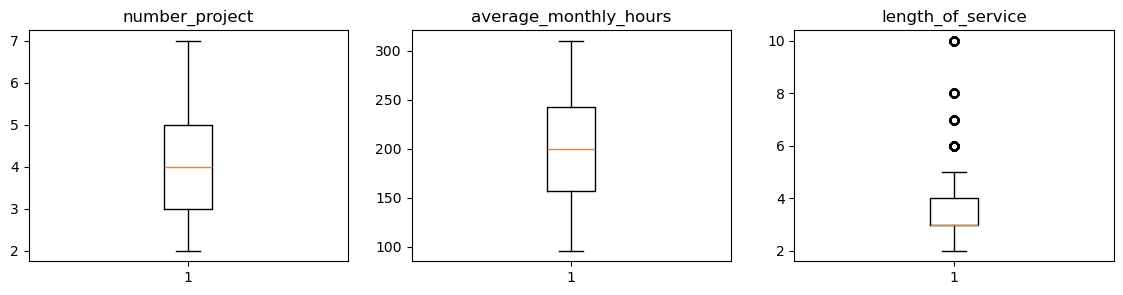

In [43]:
# check for outliers in boxplots
num_columns =['number_project','average_monthly_hours','length_of_service']
fig,axes = plt.subplots(1,3,figsize=(14,3))

for i in range(len(num_columns)):
    axes[i].boxplot(df[num_columns[i]])
    axes[i].set_title(num_columns[i])


No outliers need to remove

# Analyze phase in PACE strategy

In [ ]:
test
